<a href="https://colab.research.google.com/github/joel-rodgers/compiler-construction/blob/main/Lab_Activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP MEMBERS (ICS4C)**
1.   122184-Joel Rodgers K'obara
2.   120226-Davies Nathan Akidiva
3.   115862-Richard Jeremy Githuba
4.   121660-Alex Wamai Kariuki
5.   120357-Bettyrose Mburu















**Lab 1: Flex, Bison, Lex, Yacc**

**Flex**

Flex (fast lexical analyzer generator) is a free and open-source software alternative to lex. It is a tool/computer program for generating lexical analyzers (scanners or lexers). It is used together with Berkeley Yacc parser generator or GNU Bison parser generator.

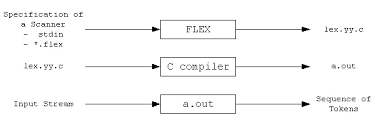

**Flex code snippet**

In [ ]:
/***Code to Count the number of characters and number of lines in the input ***/
/* Declaring two counters one for number
of lines other for number of characters */
%{
int no_of_lines = 0;
int no_of_chars = 0;
%}

/***rule 1 counts the number of lines,
rule 2 counts the number of characters
and rule 3 specifies when to stop
taking input***/
%%
\n	 ++no_of_lines;
.	 ++no_of_chars;
end	 return 0;
%%

/*** User code section***/
int yywrap(){}
int main(int argc, char **argv)
{

yylex();
printf("number of lines = %d, number of chars = %d\n",
	no_of_lines, no_of_chars );

return 0;
}


**Bison**

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR parser employing LALR, IELR or canonical LR parser tables. Bison is compatible with Yacc, properly written Yacc grammars can work with Bison without changing the grammar.

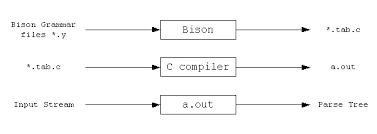

**Bison code snippet**

In [ ]:
/* simplest version of calculator */
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

**Lex**

Lex is a program that generates lexical analyzer. It is used with YACC parser generator. The lexical analyzer is a program that transforms an input stream into a sequence of tokens.It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


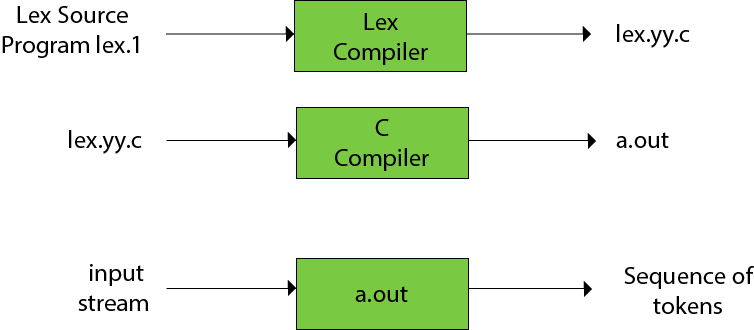

**Lex code snippet**

In [ ]:
/*lex abc.l (abc is the file name)
cc lex.yy.c -efl
./a.out */

Input : 
3+3
Output :
6.0

Input : 
5*4
Output : 
20.0 

/*lex program to implement
		- a simple calculator.*/

% {
int op = 0,i;
float a, b;
% }

dig [0-9]+|([0-9]*)"."([0-9]+)
add "+"
sub "-"
mul "*"
div "/"
pow "^"
ln \n
%%

/* digi() is a user defined function */
{dig} {digi();}
{add} {op=1;}
{sub} {op=2;}
{mul} {op=3;}
{div} {op=4;}
{pow} {op=5;}
{ln} {printf("\n The Answer :%f\n\n",a);}

%%
digi()
{
if(op==0)

/* atof() is used to convert
	- the ASCII input to float */
a=atof(yytext);

else
{
b=atof(yytext);

switch(op)
{
case 1:a=a+b;
	break;

case 2:a=a-b;
break;

case 3:a=a*b;
break;

case 4:a=a/b;
break;

case 5:for(i=a;b>1;b--)
a=a*i;
break;
}
op=0;
}
}

main(int argv,char *argc[])
{
yylex();
}

yywrap()
{
return 1;
}


**Yacc**

YACC stands for Yet Another Compiler Compiler.
YACC provides a tool to produce a parser for a given grammar.
YACC is a program designed to compile a Look ahead left right(LALR) grammar.
It is used to produce the source code of the syntactic analyzer of the language produced by LALR grammar.
The input of YACC is the rule or grammar and the output is a C program.

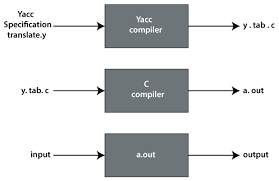

**Yacc code snippet**

In [ ]:
%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}
